In [1]:
# Import some basic libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('paper')

# Hands-On Activity 1.2: The Model Calibration Problem

## Objectives

+ To introduce the model calibration problem.

## The model calibration problem

The model calibration problem is the inverse of the uncertainty propagation problem.
That is why such problems are also called **inverse problems**.
It goes as follows. 
One observes a quantity that is predicted by the model and they want to go back and characterize how this observation changes the state of knowledge about the parameters of the model.

## Example: Driving a trailer on a rough road

Remember the example of the previous handout: We have a trailer of mass $m$ moving on a rough road with speed $v$.
The suspension spring constant is $k$.
We are intersted in the vibration amplitude $X$.

![Trailer](trailer.png)

Imagine that we put sensors on the suspension of the trailer to measure the amplitude of oscillation.
The amplitude that the sensors measure does not match exactly the prediction of the model.
Why is that?
First, there is observation noise.
Second, our model has a systematic error (e.g., we have completely ignored dumping effects).
So, *the measurement is not the same as the model prediction*.
This means that we need to add one more node to the graphical representation of the model.
The new node, let's call it $X_m$ is the result of the measurement.

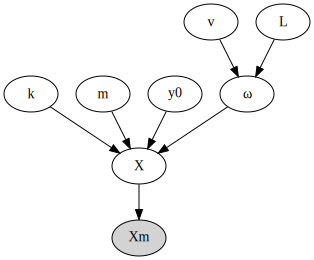

In [2]:
from graphviz import Digraph
g = Digraph('Trailer')
g.node('k')
g.node('m')
g.node('y0', label='<y<sub>0</sub>>')
g.node('omega', label='<&omega;>')
g.node('v')
g.node('L')
g.node('X')
g.edge('v', 'omega')
g.edge('L', 'omega')
g.edge('y0', 'X')
g.edge('omega', 'X')
g.edge('k', 'X')
g.edge('m', 'X')
g.node('Xm', label='<X<sub>m</sub>>', style='filled')
g.edge('X', 'Xm')
#g.render('trailer_m_g', format='png')
g

We have filled the node $X_m$ with color to indicate that it is observed.
Here the calibration problem consists of determining all unknown parameters given the sensor data.
Of course, this particular model calibration is not very well defined.
There is absolutely no hope that you can find all variables $k$, $m$, $y_0$, $v$, and $L$ from just a noisy measurment of the amplitude.
The situation becomes a bit better if you decide to ignore the uncertainty in $k$ because it is determined very accurately, and you add sensors to measure the mass of the cart $m$ and the velocity of the speed of the vehicle $v$.
Let $m_m$ and $v_m$ be the measurement from such sensors. The updated graph is:

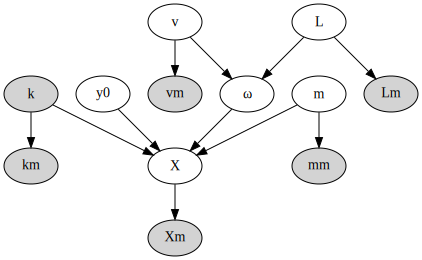

In [6]:
g = Digraph('Trailer')
g.node('k', style='filled')
g.node('km', style='filled', label='<k<sub>m</sub>>')
g.node('m')
g.node('mm', label='<m<sub>m</sub>>', style='filled')
g.node('y0', label='<y<sub>0</sub>>')
g.node('omega', label='<&omega;>')
g.node('v')
g.node('vm', label='<v<sub>m</sub>>', style='filled')
g.node('L')
g.node('Lm', style='filled', label='<L<sub>m</sub>>')
g.node('X')
g.edge('L', 'Lm')
g.edge('k', 'km')
g.edge('v', 'omega')
g.edge('v', 'vm')
g.edge('L', 'omega')
g.edge('y0', 'X')
g.edge('omega', 'X')
g.edge('k', 'X')
g.edge('m', 'X')
g.edge('m', 'mm')
g.node('Xm', label='<X<sub>m</sub>>', style='filled')
g.edge('X', 'Xm')
#g.render('trailer_m_g', format='png')
g

Now $y_0$ and $L$ would be identifiable.

### Solving inverse problems

We will need a couple of lectures to understand what is the right way to pose and solve the problem.
But here is the answer:
+ Quantify our **prior** state of knowledge about all the model parameters (by assigning probability densities to them).
+ Use Bayes' rule to condition the prior knowledge on the observations. This updated knowledge is our **posterior knowledge**. Unfortunately, this posterior knowledge is rarely analytically available. This is why we need the third step.
+ Create a practical procedure that characterizes our posterior state of knowledge.

The majority of this class is about the third step.

### Questions

+ Modify the causal graph above to account for an indirect measurement of the spring stiffness. Hint: Add new node $k_m$ corresponding to an output of a "stiffness" sensor and connect it to $k$ with an appropriatly pointing arrow.
+ Modify the causal model to add sensors that estimate the wavelength $L$ of the road oscilations, e.g., by taking and analyzing pictures of the road from a vehicle camera.